<a href="https://colab.research.google.com/github/tarashagarwal/Analyzing-a-Global-Supply-Chain-Network/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [148]:
#Create a Mode Class that inhertis nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --->
  #Hidden Layer1 (number of neurons) --->
  #H2 (n) -->
  #output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [149]:
start_state = 32
torch.manual_seed(start_state)
model = Model()

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [152]:
my_df['variety'] = my_df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})
my_df

/tmp/ipython-input-1354793617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [153]:
#Train Test Split
x = my_df.drop('variety', axis=1)
y = my_df['variety']

In [154]:
# Comvert these to numpy arrays
x = x.values
y = y.values

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=start_state)

In [157]:
#covert X features to float tensors
x_train = torch.FloatTensor(x_train)
x_test  = torch.FloatTensor(x_test)

In [158]:
#Convert y labesls to tensors long
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)

In [159]:
#Set Criteria for the model to measure the error, how far off the predictions are from the predictions
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learnign rate (if error doesn't go downb after a bunch of iterations (epocs) we have to lowe out learnign rate.)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [160]:
#Epochs? (one runs through the entire traing data)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) #Get Predicted Results

  #Measure the loss/error, and it is gonna be high at first
  loss = criterion(y_pred, y_train)

  #Keep Track of losses
  losses.append(loss.detach().numpy())

  #Print after every 10 epocs
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


Text(0.5, 0, 'Epochs')

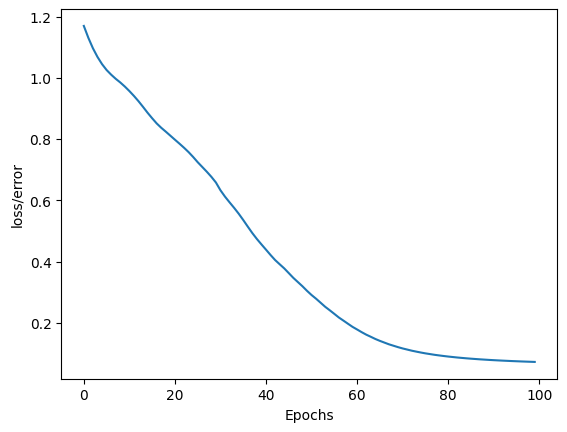

In [161]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')

In [162]:
#Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)
  print(f'Loss on test set: {loss}')

Loss on test set: 0.05382997915148735


In [163]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-3.3646,  3.9392,  0.3720])    1
 2. tensor([  7.5572,   1.1015, -11.3347]) 0
 3. tensor([  6.5957,   1.5027, -10.4091]) 0
 4. tensor([-3.3331,  4.2594,  0.0623])    1
 5. tensor([-7.3782,  2.8087,  5.1605])    2
 6. tensor([-7.3760,  3.9013,  4.2826])    2
 7. tensor([  6.1971,   1.6470, -10.0047]) 0
 8. tensor([  6.6383,   1.4348, -10.4031]) 0
 9. tensor([-2.6753,  4.3091, -0.6392])    1
10. tensor([  7.1875,   1.3812, -11.0965]) 0
11. tensor([-3.8318,  4.4027,  0.5246])    1
12. tensor([-8.6807,  1.9994,  6.8923])    2
13. tensor([-2.0678,  3.8200, -0.7571])    1
14. tensor([-1.0768,  4.3741, -2.2838])    1
15. tensor([-7.4965,  2.6207,  5.3287])    2
16. tensor([-8.6136,  1.5508,  7.1186])    2
17. tensor([-3.7761,  3.6462,  0.9487])    1
18. tensor([-6.7608,  2.7754,  4.5281])    2
19. tensor([-1.7048,  4.1980, -1.4670])    1
20. tensor([  7.7757,   1.3740, -11.8864]) 0
21. tensor([  6.8811,   1.5887, -10.8763]) 0
22. tensor([-9.4350,  2.7012,  7.2406])    2
23. tensor

In [164]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [165]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([  6.8839,   1.2461, -10.5586])
0


In [166]:
# Save our NN Model
torch.save(model.state_dict(), 'iris_model.pt')

In [167]:
#Lofa the saved Mode
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [168]:
new_model.eval();